서울시 구별 CCTV 현황 분석하기
- pandas, matplotlib 라이브러리 사용하기
- 서울시 각 구별 CCTV 현황 살펴보기, 인구대비 CCTV비율이 높은/낮은 지역 알아보기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### csv 파일 읽기 - 서울시 구별 CCTV 현황

In [5]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv')

In [6]:
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [7]:
# 컬럼 이름 바꾸기
CCTV_Seoul.rename(columns={'기관명':'구'}, inplace=True)  
# inplace = true 이바뀐사항을 앞에 변수에 적용시키는 함수 원래는 inplace=false상태임

In [8]:
CCTV_Seoul

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


#### 엑셀파일 읽기 - 서울시 인구현황

In [14]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls',header=2,
                         usecols="B,D,G,J,N")
#원하는 행, 열 설정하여 읽어오기
# header : 읽고 싶은 row index(0부터 시작) - 머리부분에 몇번째줄부터 데이터로 지정할지
#usecols : 읽고 싶은 column 선택 

In [15]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [17]:
# 컬럼명 수정
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [18]:
pop_Seoul.columns =['구','인구수','한국인수','외국인수','65세이상고령자']
# 모든 컬럼 지정해줘야함 ! (컬럼 수 안맞으면 오류남 !)

In [19]:
pop_Seoul.columns

Index(['구', '인구수', '한국인수', '외국인수', '65세이상고령자'], dtype='object')

### 3. 결측치 확인
- 데이터파일을 가져오면 우선 파일전반적인 데이터형태 확인과 결측치를 확인(결측치 여부, 결측치 의 비율)

In [22]:
CCTV_Seoul.info()
#데이터의 전반적인 정보보는 함수 : info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구          25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [23]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구         26 non-null     object 
 1   인구수       26 non-null     float64
 2   한국인수      26 non-null     float64
 3   외국인수      26 non-null     float64
 4   65세이상고령자  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [24]:
# 결측치 확인 - isnull
pop_Seoul['인구수'].isnull()
#pop서울에 인구수 컬럼에 결측치가있는지 없는지 -> True뜨는 데이터가 결측치 데이터

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 인구수, dtype: bool

In [25]:
#불리언 인덱싱
pop_Seoul[ pop_Seoul['인구수'].isnull()]

,구,인구수,한국인수,외국인수,65세이상고령자
26,NaN,NaN,NaN,NaN,NaN


In [27]:
#결측치 삭제해주기
pop_Seoul.drop(26, inplace=True)

In [28]:
pop_Seoul

,구,인구수,한국인수,외국인수,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


### 4. CCTV 수가 많은/적은 지역 파악하기
- 많은 지역 5개 

In [29]:
CCTV_Seoul.sort_values

<bound method DataFrame.sort_values of        구    소계  2013년도 이전  2014년  2015년  2016년
0    강남구  2780       1292    430    584    932
1    강동구   773        379     99    155    377
2    강북구   748        369    120    138    204
3    강서구   884        388    258    184     81
4    관악구  1496        846    260    390    613
5    광진구   707        573     78     53    174
6    구로구  1561       1142    173    246    323
7    금천구  1015        674     51    269    354
8    노원구  1265        542     57    451    516
9    도봉구   485        238    159     42    386
10  동대문구  1294       1070     23    198    579
11   동작구  1091        544    341    103    314
12   마포구   574        314    118    169    379
13  서대문구   962        844     50     68    292
14   서초구  1930       1406    157    336    398
15   성동구  1062        730     91    241    265
16   성북구  1464       1009     78    360    204
17   송파구   618        529     21     68    463
18   양천구  2034       1843    142     30    467
19  영등포구   904       

In [34]:
CCTV_Seoul.sort_values(by ='소계').head()

,구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [33]:
CCTV_Seoul.sort_values(by ='소계',ascending=False).head()
#오름차순으로 많은 수 

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


- 적은 지역 5개

In [35]:
CCTV_Seoul.sort_values(by ='소계',ascending=False).tail()

,구,소계,2013년도 이전,2014년,2015년,2016년
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109
17,송파구,618,529,21,68,463
12,마포구,574,314,118,169,379
9,도봉구,485,238,159,42,386


### 5. 데이터 병합

In [40]:
CCTV_구_set = set(CCTV_Seoul['구'].unique())
CCTV_구_set
# 중복없이 뽑아주는 .unique()
# 중복이없는채로 set 집합자료채로 보면 {} 형태로나옴 - 그냥 데이터가 ,로 차례차례 나오는
# dict도 {}형태 -> 파이썬의 자료형- 키와 벨류가 쌍으로 

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [42]:
pop_구_set = set(pop_Seoul['구'].unique())
pop_구_set

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 '합계'}

In [43]:
# 위처럼 집합 자료형 만들고,
# 차집합 연산 진행 !

CCTV_구_set - pop_구_set

set()

In [44]:
pop_구_set - CCTV_구_set

{'합계'}

In [47]:
# '구' 컬럼 기준으로 데이터 병합
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on ='구')
data_result

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0


### 6. 인구수대비 CCTV 비율이 높은/ 낮은 지역 알아보기
- 특성공학 : 컬럼끼리 연산을 통해 의미있는 컬럼을 만드는 작업

In [49]:
(data_result['소계'] / data_result['인구수'])* 100

0     0.487292
1     0.170552
2     0.226535
3     0.146413
4     0.284673
5     0.189970
6     0.348536
7     0.397911
8     0.222170
9     0.139110
10    0.350207
11    0.264472
12    0.147312
13    0.294043
14    0.428594
15    0.341211
16    0.317391
17    0.092587
18    0.423769
19    0.224326
20    0.665020
21    0.378852
22    0.615404
23    0.503603
24    0.159227
dtype: float64

In [50]:
# 연산된 값으로 새 컬럼 생성
data_result['인구대비 CCTV비율'] = (data_result['소계'] / data_result['인구수'])* 100

In [54]:
data_result

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자,인구대비 CCTV비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.170552
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,0.226535
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,0.146413
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,0.284673
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0,0.189970
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,0.348536
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,0.397911
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0,0.222170
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.139110


In [56]:
# 인구수 대비 CCTV가 많은 지역
data_result.sort_values(by ='인구대비 CCTV비율',ascending=False).head()

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자,인구대비 CCTV비율
20,용산구,1624,1368,218,112,398,244203.0,229456.0,14747.0,36231.0,0.665020
22,종로구,1002,464,314,211,630,162820.0,153589.0,9231.0,25425.0,0.615404
23,중구,671,413,190,72,348,133240.0,124312.0,8928.0,20764.0,0.503603
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
14,서초구,1930,1406,157,336,398,450310.0,445994.0,4316.0,51733.0,0.428594


In [57]:
data_result.sort_values(by ='인구대비 CCTV비율',ascending=False).tail()

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자,인구대비 CCTV비율
24,중랑구,660,509,121,177,109,414503.0,409882.0,4621.0,56774.0,0.159227
12,마포구,574,314,118,169,379,389649.0,378566.0,11083.0,48765.0,0.147312
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,0.146413
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.139110
17,송파구,618,529,21,68,463,667483.0,660584.0,6899.0,72506.0,0.092587


In [59]:
from matplotlib import rc
rc('font', family='Malgun Gothinc')

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


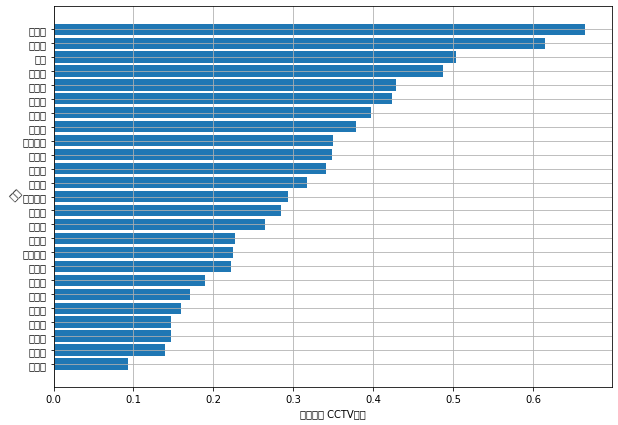

In [62]:
plt.figure(figsize=(10,7))
plt.barh(data_result.sort_values(by='인구대비 CCTV비율')['구'],
        data_result['인구대비 CCTV비율'].sort_values())
plt.xlabel('인구대비 CCTV비율')
plt.ylabel('구별',rotation=45)
plt.grid()
plt.show()